# Project Title

## Project description

### Imports

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import requests

### Getting the datasets for Kineret project
[Kineret dataset link](https://data.gov.il/dataset/https-www-data-gov-il-dataset-682)

In [3]:
base_url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=2de7b543-e13d-4e7e-b4c8-56071bc4d3c8'
all_records = []

# Fetch the first page to get the total number of records
response = requests.get(base_url)
if response.status_code == 200:
    data = response.json()
    total_records = data['result']['total']
    all_records.extend(data['result']['records'])
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")
    total_records = 0

# Calculate the number of iterations needed based on the limit (100 records per request in this case)
iterations = (total_records // 100) + 1

for i in range(1, iterations):
    offset = i * 100
    response = requests.get(f"{base_url}&offset={offset}")
    if response.status_code == 200:
        data = response.json()
        all_records.extend(data['result']['records'])
    else:
        print(f"Failed to fetch data at offset {offset}. Status code: {response.status_code}")

# Convert all_records to a DataFrame
df_kineret_level = pd.DataFrame(all_records)

# Convert the 'Survey_Date' column to pandas datetime format
df_kineret_level['Survey_Date'] = pd.to_datetime(df_kineret_level['Survey_Date'])

print(df_kineret_level.head())

   _id Survey_Date Kinneret_Level
0    1  2023-07-20       -210.465
1    2  2023-07-19       -210.465
2    3  2023-07-18       -210.445
3    4  2023-07-17       -210.435
4    5  2023-07-16       -210.425


#### Data cleaning

In [4]:
# This dataset has data from 1964, I want data from the 80s to today
# Filter the DataFrame for dates from 1980 onwards
df_kineret_level = df_kineret_level[df_kineret_level['Survey_Date'] >= '1980-01-01']


# Convert the 'Kinneret_Level' column to a numeric data type
df_kineret_level['Kinneret_Level'] = pd.to_numeric(df_kineret_level['Kinneret_Level'], errors='coerce')

#### Data exploration

In [5]:
print(df_kineret_level.head(10))
print('-'*20)
print(df_kineret_level.info())
print('-'*20)
print(df_kineret_level.describe())

   _id Survey_Date  Kinneret_Level
0    1  2023-07-20        -210.465
1    2  2023-07-19        -210.465
2    3  2023-07-18        -210.445
3    4  2023-07-17        -210.435
4    5  2023-07-16        -210.425
5    6  2023-07-13        -210.385
6    7  2023-07-12        -210.380
7    8  2023-07-11        -210.370
8    9  2023-07-10        -210.360
9   10  2023-07-09        -210.350
--------------------
<class 'pandas.core.frame.DataFrame'>
Index: 9497 entries, 0 to 9496
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   _id             9497 non-null   int64         
 1   Survey_Date     9497 non-null   datetime64[ns]
 2   Kinneret_Level  9497 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 296.8 KB
None
--------------------
               _id                    Survey_Date  Kinneret_Level
count  9497.000000                           9497     9497.000000
mean

In [8]:
above_zero = df_kineret_yearly['Kinneret_Level'] > 0

if above_zero.any():
    print("Yes, 'Kinneret_Level' was above 0 at some point.")
else:
    print("No, 'Kinneret_Level' was never above 0.")
    print('The max level of the Kinneret_Level was {k_l_max}.'.format(k_l_max=df_kineret_yearly['Kinneret_Level'].max()))
    print('The min level of the Kinneret_Level was {k_l_min}.'.format(k_l_min=df_kineret_yearly['Kinneret_Level'].min()))

No, 'Kinneret_Level' was never above 0.
The max level of the Kinneret_Level was -208.79.
The min level of the Kinneret_Level was -214.87.


In [9]:
print('The lowest Kinneret_Level was {k_l_min}.'.format(k_l_min=df_kineret_level['Kinneret_Level'].min()))
print('The mean Kinneret_Level from the 80s till today is {k_l_mean:.2f}.'.format(k_l_mean=df_kineret_level['Kinneret_Level'].mean()))

The lowest Kinneret_Level was -214.87.
The mean Kinneret_Level from the 80s till today is -211.69.


### visualizations

1. Average Kinneret Level Over Time

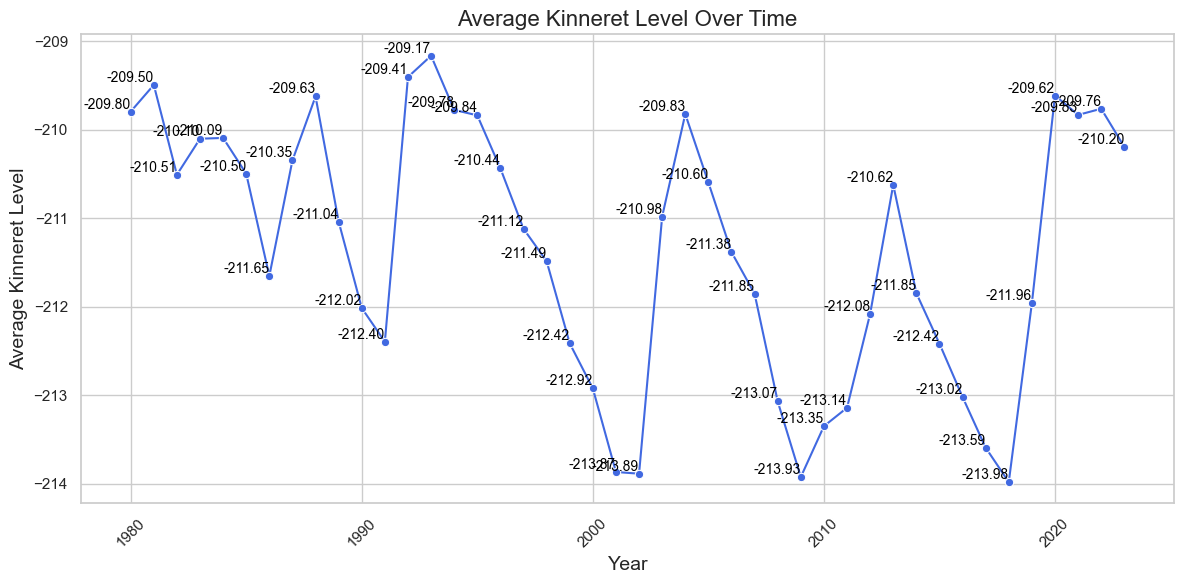

In [7]:
df_kineret_yearly = df_kineret_level

# Extract the year from the 'Survey_Date' column and create a new 'Year' column
df_kineret_yearly['Year'] = df_kineret_yearly['Survey_Date'].dt.year

# Group by the 'Year' column and calculate the mean
yearly_avg = df_kineret_yearly.groupby('Year').mean().reset_index()

# Set the style of Seaborn
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Year', y='Kinneret_Level', data=yearly_avg, marker="o", color="royalblue")

# Set plot title and labels
plt.title('Average Kinneret Level Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Kinneret Level', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the real value above each dot
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', verticalalignment='bottom', horizontalalignment='right', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

2. Average Kinneret Level Over the Last 10 Years

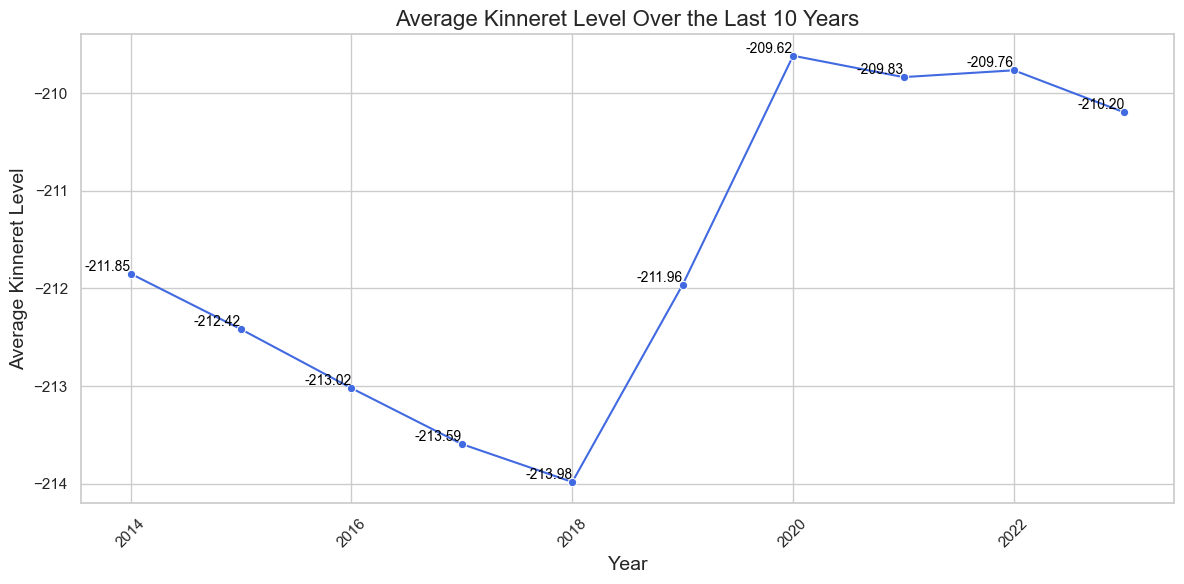

In [10]:
# Filter the DataFrame to include only the last ten years
last_ten_years = yearly_avg[yearly_avg['Year'] > yearly_avg['Year'].max() - 10]

# Set the style of Seaborn
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Year', y='Kinneret_Level', data=last_ten_years, marker="o", color="royalblue")

# Set plot title and labels
plt.title('Average Kinneret Level Over the Last 10 Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Kinneret Level', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the real value above each dot
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', verticalalignment='bottom', horizontalalignment='right', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

3. Average Kinneret Level Over the Last 5 Years

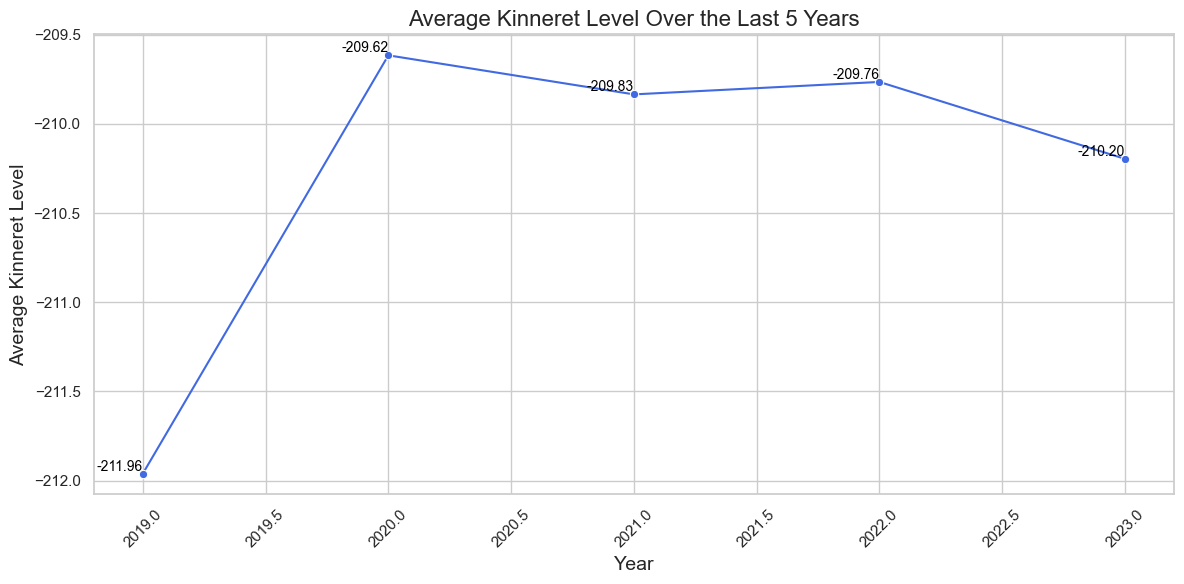

In [11]:
# Filter the DataFrame to include only the last ten years
last_ten_years = yearly_avg[yearly_avg['Year'] > yearly_avg['Year'].max() - 5]

# Set the style of Seaborn
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Year', y='Kinneret_Level', data=last_ten_years, marker="o", color="royalblue")

# Set plot title and labels
plt.title('Average Kinneret Level Over the Last 5 Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Kinneret Level', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the real value above each dot
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', verticalalignment='bottom', horizontalalignment='right', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

4. Distribution of Kinneret Levels

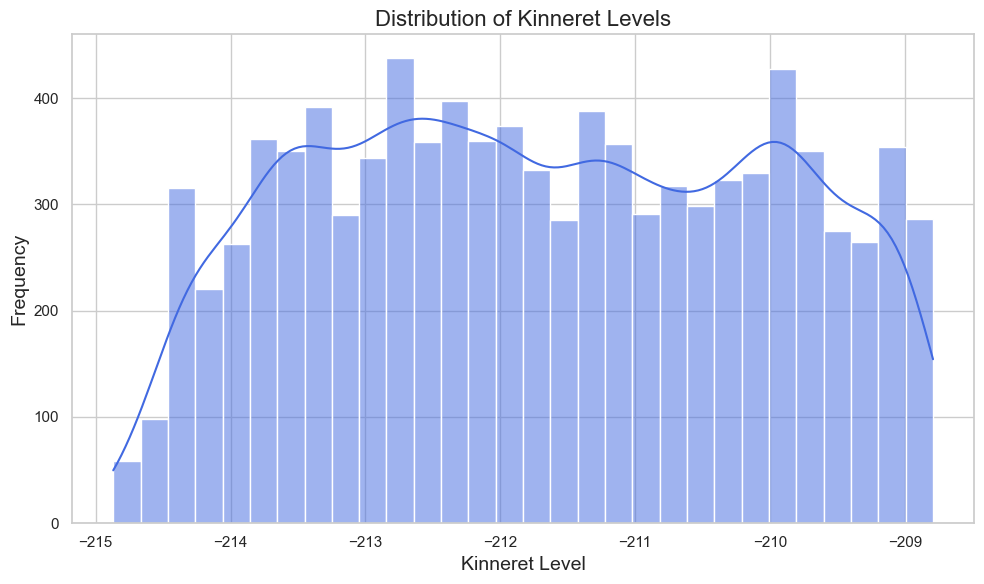

In [12]:
# Set the style of Seaborn
sns.set_theme(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_kineret_yearly['Kinneret_Level'], bins=30, color="royalblue", kde=True)

# Set plot title and labels
plt.title('Distribution of Kinneret Levels', fontsize=16)
plt.xlabel('Kinneret Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------

### Getting the datasets for Kineret chlorid project
[Kineret CL dataset link](https://data.gov.il/dataset/kinneret_cl)

In [23]:
base_url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=b1d290c4-220b-494d-8376-0465789e972b'
all_records = []

# Fetch the first page to get the total number of records
response = requests.get(base_url)
if response.status_code == 200:
    data = response.json()
    total_records = data['result']['total']
    all_records.extend(data['result']['records'])
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")
    total_records = 0

# Calculate the number of iterations needed based on the limit (100 records per request in this case)
iterations = (total_records // 100) + 1

for i in range(1, iterations):
    offset = i * 100
    response = requests.get(f"{base_url}&offset={offset}")
    if response.status_code == 200:
        data = response.json()
        all_records.extend(data['result']['records'])
    else:
        print(f"Failed to fetch data at offset {offset}. Status code: {response.status_code}")

# Convert all_records to a DataFrame
df_kineret_CL = pd.DataFrame(all_records)

# Convert the 'Survey_Date' column to pandas datetime format, the dayfirst=True is adjusted to date raw data format
df_kineret_CL['Survey_Date'] = pd.to_datetime(df_kineret_CL['תאריך ניטור'], dayfirst=True)

print(df_kineret_CL.head())

   _id שם תחנה תאריך ניטור סמל פרמטר עומק הדגימה במטרים תוצאה יחידת מדידה  \
0    1  כנרת A  05/01/1969        Cl                  1   284        MG/L   
1    2  כנרת A  12/01/1969        Cl                  1   284        MG/L   
2    3  כנרת A  19/01/1969        Cl                  1   282        MG/L   
3    4  כנרת A  27/01/1969        Cl                  1   275        MG/L   
4    5  כנרת A  02/02/1969        Cl                  1   281        MG/L   

  Survey_Date  
0  1969-01-05  
1  1969-01-12  
2  1969-01-19  
3  1969-01-27  
4  1969-02-02  


#### Data cleaning

In [24]:
df_kineret_CL.columns

Index(['_id', 'שם תחנה', 'תאריך ניטור', 'סמל פרמטר', 'עומק הדגימה במטרים',
       'תוצאה', 'יחידת מדידה', 'Survey_Date'],
      dtype='object')

In [25]:
# This dataset has data from 1969, I want data from the 80s to today
# Filter the DataFrame for dates from 1980 onwards
df_kineret_CL = df_kineret_CL[df_kineret_CL['Survey_Date'] >= '1980-01-01']


# Convert the 'תוצאה' column to a numeric data type
df_kineret_CL['תוצאה'] = pd.to_numeric(df_kineret_CL['תוצאה'], errors='coerce')
df_kineret_CL['cl_Level'] = df_kineret_CL['תוצאה']

In [26]:
print(df_kineret_CL.head())

     _id שם תחנה תאריך ניטור סמל פרמטר עומק הדגימה במטרים  תוצאה יחידת מדידה  \
340  341  כנרת A  13/01/1980        Cl                  1  232.0        MG/L   
341  342  כנרת A  27/01/1980        Cl                  1  233.0        MG/L   
342  343  כנרת A  10/02/1980        Cl                  1  236.0        MG/L   
343  344  כנרת A  26/02/1980        Cl                  1  230.0        MG/L   
344  345  כנרת A  09/03/1980        Cl                  1  230.0        MG/L   

    Survey_Date  cl_Level  
340  1980-01-13     232.0  
341  1980-01-27     233.0  
342  1980-02-10     236.0  
343  1980-02-26     230.0  
344  1980-03-09     230.0  


In [27]:
""" 
Now i want to remove unnecessary columns:
The '_id' column is not relavent.
The 'שם תחנה' column is constant set to 'כנרת A'
The 'סמל פרמטר' column is constant set to 'Cl'
The 'עומק הדגימה במטרים' column is constant set to '1'
The 'יחידת מדידה' column is constant set to 'MG/L'
The 'תוצאה' and 'תאריך ניטור' have been replaced by the 'cl_Level' and 'Survey_Date' respectivly
"""
# List of columns to drop
columns_to_drop = [
    '_id', 
    'שם תחנה', 
    'סמל פרמטר', 
    'עומק הדגימה במטרים', 
    'יחידת מדידה', 
    'תוצאה', 
    'תאריך ניטור'
]

# Drop the columns
df_kineret_CL = df_kineret_CL.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df_kineret_CL.head())

    Survey_Date  cl_Level
340  1980-01-13     232.0
341  1980-01-27     233.0
342  1980-02-10     236.0
343  1980-02-26     230.0
344  1980-03-09     230.0


#### Data exploration

In [28]:
print(df_kineret_CL.head(10))
print('-'*20)
print(df_kineret_CL.info())
print('-'*20)
print(df_kineret_CL.describe())

    Survey_Date  cl_Level
340  1980-01-13     232.0
341  1980-01-27     233.0
342  1980-02-10     236.0
343  1980-02-26     230.0
344  1980-03-09     230.0
345  1980-03-23     220.0
346  1980-04-08     219.0
347  1980-04-22     214.0
348  1980-05-04     208.0
349  1980-05-18     214.0
--------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1925 entries, 340 to 2264
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Survey_Date  1925 non-null   datetime64[ns]
 1   cl_Level     1925 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.1 KB
None
--------------------
                         Survey_Date     cl_Level
count                           1925  1925.000000
mean   2002-12-28 21:48:20.571428608   248.579688
min              1980-01-13 00:00:00   185.000000
25%              1993-03-07 00:00:00   223.000000
50%              2003-03-03 00:00:00   247.000000
75%     

### visualizations

1. Average Cl Level Over Time

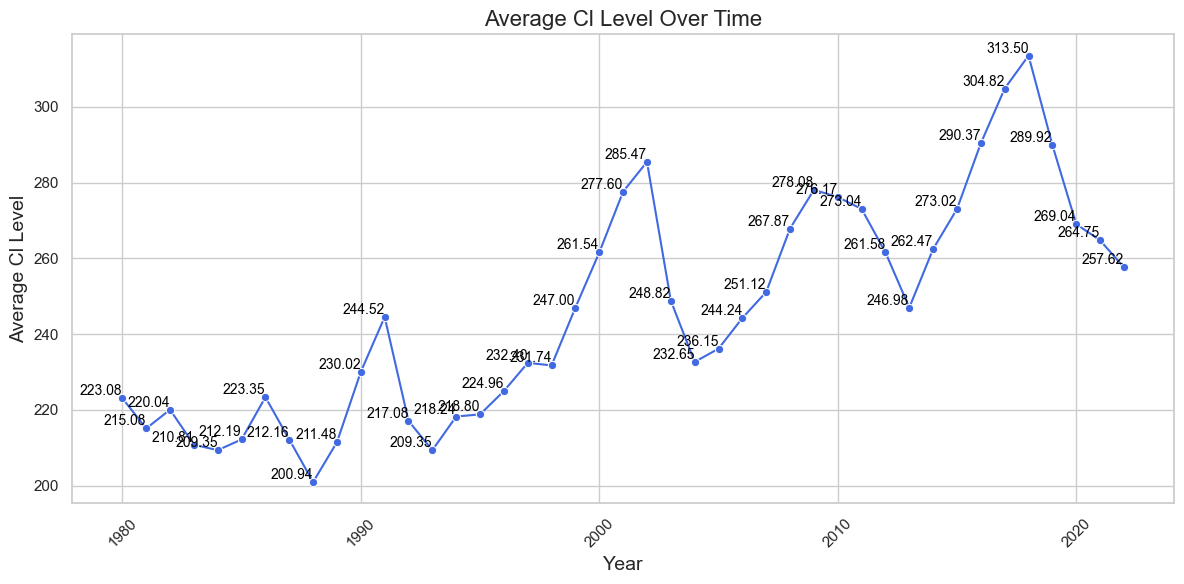

In [29]:
df_cl_yearly = df_kineret_CL

# Extract the year from the 'Survey_Date' column and create a new 'Year' column
df_cl_yearly['Year'] = df_cl_yearly['Survey_Date'].dt.year

# Group by the 'Year' column and calculate the mean
yearly_avg_cl = df_cl_yearly.groupby('Year').mean().reset_index()

# Set the style of Seaborn
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Year', y='cl_Level', data=yearly_avg_cl, marker="o", color="royalblue")

# Set plot title and labels
plt.title('Average Cl Level Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Cl Level', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the real value above each dot
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.2f}', verticalalignment='bottom', horizontalalignment='right', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

## Kineret dataset combined

In [30]:
"""
To combine the two dataframes df_kineret_level and df_kineret_CL based on the dates, I'll use the merge function.
I'll combine them based on the Survey_Date column, so this column will be the key for merging.
The how='inner' argument ensures that only rows with matching dates in both dataframes are included in the result.
"""

# Merge the two dataframes on the 'Survey_Date' column
kineret_df = pd.merge(df_kineret_level, df_kineret_CL, on='Survey_Date', how='inner')

# Display the combined dataframe
print(kineret_df.head())

   _id Survey_Date  Kinneret_Level  Year_x  cl_Level  Year_y
0  210  2022-11-27        -210.405    2022     265.0    2022
1  217  2022-11-20        -210.375    2022     265.0    2022
2  222  2022-11-15        -210.355    2022     262.0    2022
3  231  2022-11-06        -210.285    2022     262.0    2022
4  237  2022-10-30        -210.245    2022     259.0    2022


In [31]:
# Drop the '_id' and 'Year_x' columns
kineret_df.drop(columns=['_id', 'Year_x'], inplace=True)

# Rename the 'Year_y' column to 'Year'
kineret_df.rename(columns={'Year_y': 'Year'}, inplace=True)

# Display the updated dataframe
print(kineret_df.head())

  Survey_Date  Kinneret_Level  cl_Level  Year
0  2022-11-27        -210.405     265.0  2022
1  2022-11-20        -210.375     265.0  2022
2  2022-11-15        -210.355     262.0  2022
3  2022-11-06        -210.285     262.0  2022
4  2022-10-30        -210.245     259.0  2022


In [36]:
# I save this dataset for backup
kineret_df.to_csv(index=False)
kineret_df.to_excel("kineret_df.xlsx", sheet_name='Sheet_name_1')  

### visualizations

1. Line Plot

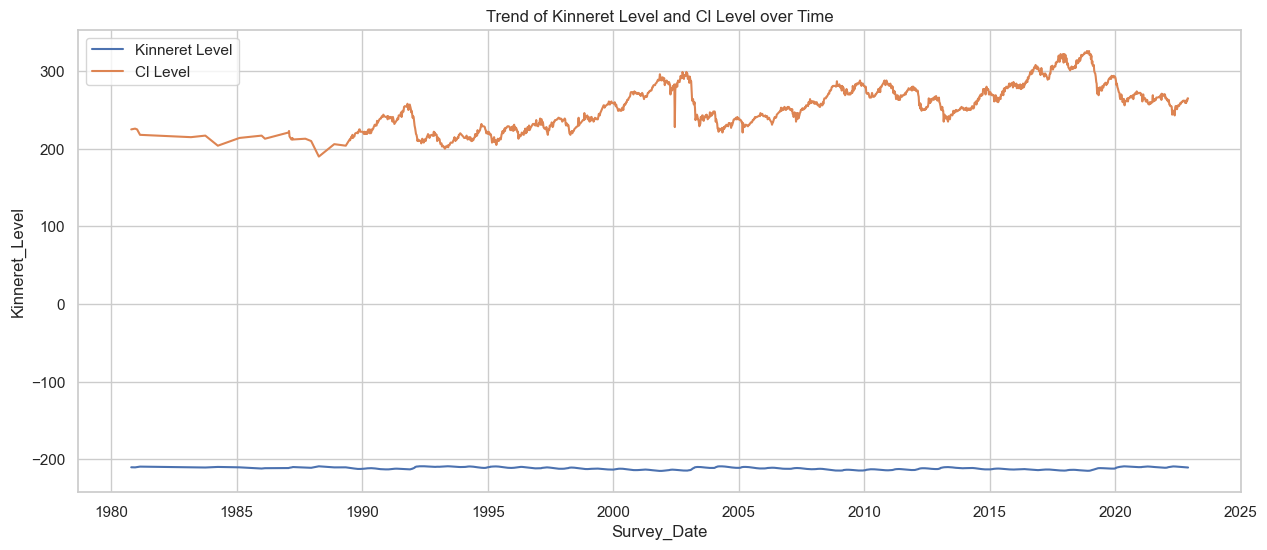

In [37]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=kineret_df, x='Survey_Date', y='Kinneret_Level', label='Kinneret Level')
sns.lineplot(data=kineret_df, x='Survey_Date', y='cl_Level', label='Cl Level')
plt.title('Trend of Kinneret Level and Cl Level over Time')
plt.legend()
plt.show()

2. Scatter Plot with Regression Line

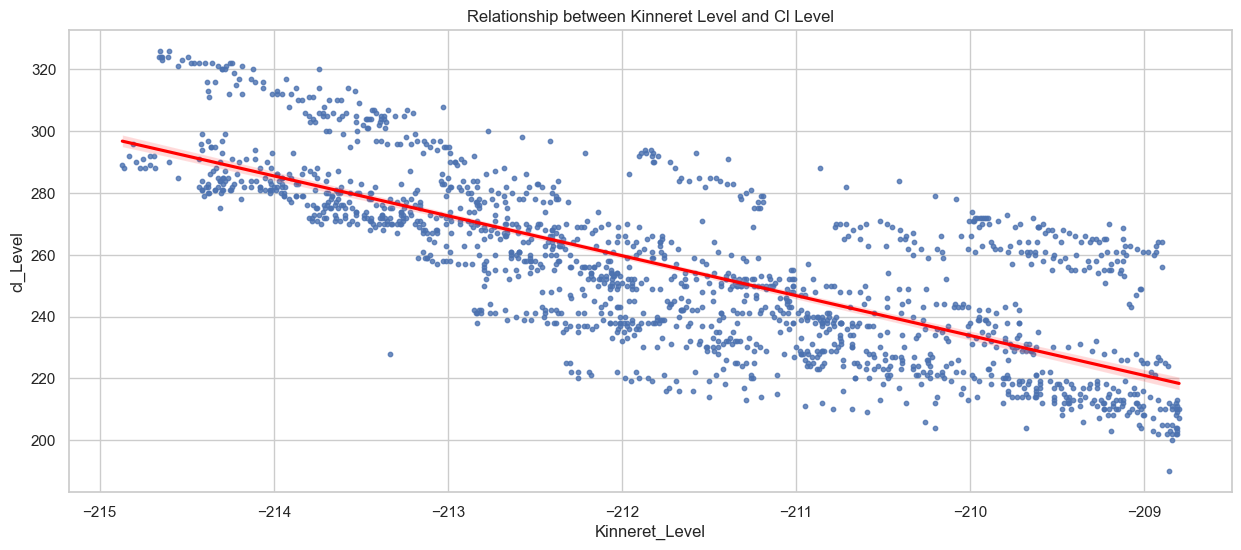

In [38]:
plt.figure(figsize=(15, 6))
sns.regplot(data=kineret_df, x='Kinneret_Level', y='cl_Level', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Relationship between Kinneret Level and Cl Level')
plt.show()

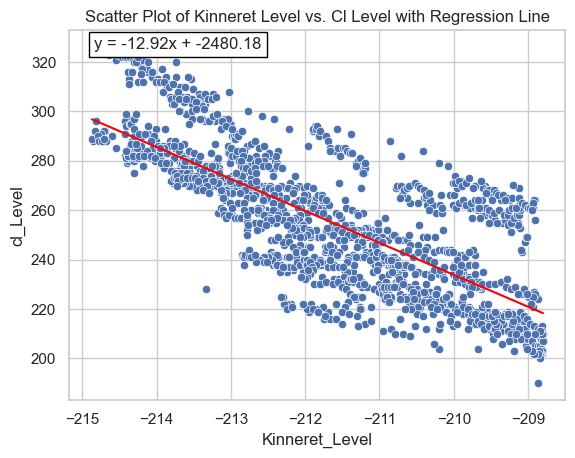

In [39]:
# Fit a linear regression model
slope, intercept = np.polyfit(kineret_df['Kinneret_Level'], kineret_df['cl_Level'], 1)

# Plot the data and the regression line
sns.scatterplot(x='Kinneret_Level', y='cl_Level', data=kineret_df)
sns.lineplot(x=kineret_df['Kinneret_Level'], y=slope*kineret_df['Kinneret_Level'] + intercept, color='red')

# Display the equation outside the plot
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", 
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="black"),
             fontsize=12)

plt.title('Scatter Plot of Kinneret Level vs. Cl Level with Regression Line')
plt.show()

3. Box Plot with 5-Year Averages

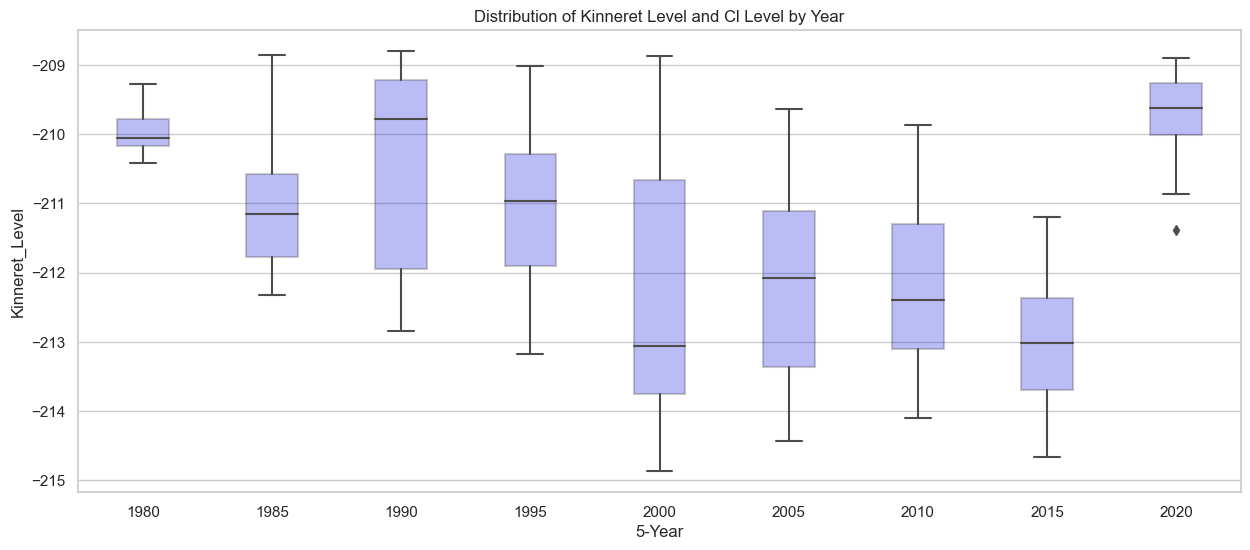

In [40]:
# Create a new column for 5-year intervals
kineret_df['5-Year'] = (kineret_df['Year'] // 5) * 5

# Calculate the mean for each 5-year interval
five_year_avg = kineret_df.groupby('5-Year').mean().reset_index()

plt.figure(figsize=(15, 6))
sns.boxplot(x='5-Year', y='Kinneret_Level', data=kineret_df, color='blue', width=0.4, boxprops=dict(alpha=.3))
# sns.boxplot(x='5-Year', y='cl_Level', data=kineret_df, color='red', width=0.4, boxprops=dict(alpha=.8))
plt.title('Distribution of Kinneret Level and Cl Level by Year')
plt.show()

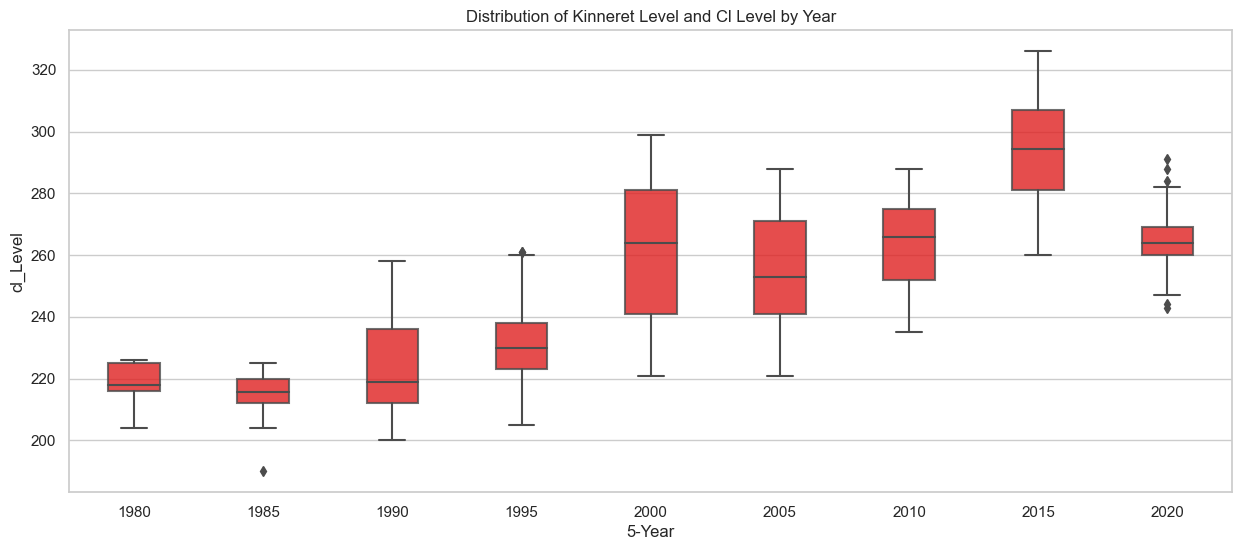

In [41]:
# Create a new column for 5-year intervals
kineret_df['5-Year'] = (kineret_df['Year'] // 5) * 5

# Calculate the mean for each 5-year interval
five_year_avg = kineret_df.groupby('5-Year').mean().reset_index()

plt.figure(figsize=(15, 6))
# sns.boxplot(x='5-Year', y='Kinneret_Level', data=kineret_df, color='blue', width=0.4, boxprops=dict(alpha=.3))
sns.boxplot(x='5-Year', y='cl_Level', data=kineret_df, color='red', width=0.4, boxprops=dict(alpha=.8))
plt.title('Distribution of Kinneret Level and Cl Level by Year')
plt.show()

# Drop the '5-Year' columns
kineret_df.drop(columns=['5-Year'], inplace=True)

4. Heatmap

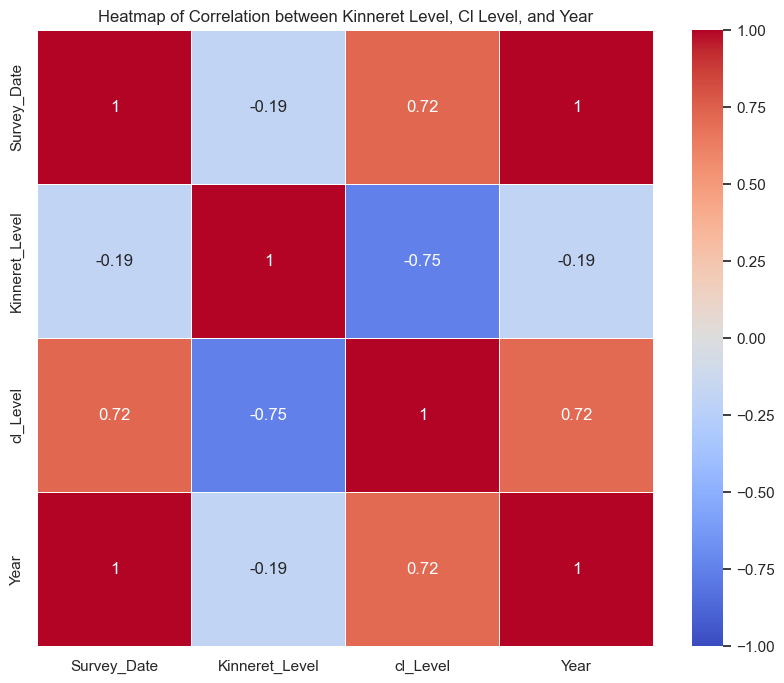

In [42]:
# Calculate the correlation matrix
corr = kineret_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Heatmap of Correlation between Kinneret Level, Cl Level, and Year')
plt.show()

--------------------------------------------------------------------------------------------------------------

### Getting the dataset for meteorological stations
[Meteorological stations dataset link](https://data.gov.il/dataset/481/resource/83841660-b9c4-4ecc-a403-d435b3e8c92f)

[Meteorological stations explanation link](https://data.gov.il/dataset/481/resource/ea4409c5-66d6-46a4-afa6-302fc0b11d85)

In [47]:
base_url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=83841660-b9c4-4ecc-a403-d435b3e8c92f'
all_records = []

# Fetch the first page to get the total number of records
response = requests.get(base_url)
if response.status_code == 200:
    data = response.json()
    total_records = data['result']['total']
    all_records.extend(data['result']['records'])
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")
    total_records = 0

# Calculate the number of iterations needed based on the limit (100 records per request in this case)
iterations = (total_records // 100) + 1

for i in range(1, iterations):
    offset = i * 100
    response = requests.get(f"{base_url}&offset={offset}")
    if response.status_code == 200:
        data = response.json()
        all_records.extend(data['result']['records'])
    else:
        print(f"Failed to fetch data at offset {offset}. Status code: {response.status_code}")

# Convert all_records to a DataFrame
df_meto_stations = pd.DataFrame(all_records)

print(df_meto_stations.head())

   _id  stn_num  stn_type         stn_name stn_name_heb  stn_long  stn_lat  \
0    1       21         1     ROSH HANIQRA    ראש הנקרה   35.1079  33.0806   
1    2      120         1  NAHARIYYA NORTH  נהרייה צפון   35.0963  33.0249   
2    3      190         1     SHAVE ZIYYON     שבי ציון   35.0923  32.9836   
3    4      282         1             AKKO          עכו   35.1020  32.9318   
4    5      282         5         AKKO MAN   עכו מאוישת   35.1020  32.9318   

   isr_grid_X  isr_grid_Y  stn_hgt            date_open           date_close  \
0      210430      776160       10  2003-09-01T00:00:00                 None   
1      209350      769980       10  1962-10-01T00:00:00  1984-01-31T00:00:00   
2      208980      765390        5  2009-10-01T00:00:00                 None   
3      209870      759650        8  1986-01-01T00:00:00  2014-09-30T00:00:00   
4      209870      759650        8  2004-01-01T00:00:00  2014-09-30T00:00:00   

   stn_auto  stn_num_env date_web_frst date_web_la

In [49]:
"""
Filter the rows where the stn_name_heb column contains the string 'כנרת',
and then it will select the stn_num column for those rows.
"""
filtered_stn_nums = df_meto_stations[df_meto_stations['stn_name_heb'].str.contains('כנרת')]['stn_num']

print(filtered_stn_nums)


249       9029
250       9030
2025    320400
2026    320405
2027    320448
2028    320449
2029    320450
Name: stn_num, dtype: int64


In [51]:
# A list of the stn_num values, converted from Series to a list:
filtered_stn_nums_list = filtered_stn_nums.tolist()
print(filtered_stn_nums_list)

[9029, 9030, 320400, 320405, 320448, 320449, 320450]


--------------------------------------------------------------------------------------------------------------

### Getting the dataset for meteorological daily rain
[Meteorological daily rain dataset link](https://data.gov.il/dataset/481/resource/e80b470f-fcbc-4987-a685-d4fbefbd75d1)
This is a large dataset with 1902482 records

[Meteorological daily rain explanation link](https://data.gov.il/dataset/481/resource/c3c3e7f7-072c-4981-9d4c-730bd7225206)

In [74]:
base_url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=e80b470f-fcbc-4987-a685-d4fbefbd75d1'

# Because the dataset is so large (1902482 records) the api requests took more than an hour so i ended up just downloading the csv
# The csv is 80,516 KB

filename = 'new_isr_rain_daily_web.csv'

# Convert all_records to a DataFrame
df_daily_rain = pd.read_csv(filename)

print(df_daily_rain.head())

   stn_num    time_obs  rain_06_next  rain_code  year  month  day monthyear
0   110010  1933-12-04           1.0          0  1933     12    4   12/1933
1   110010  1933-12-12          10.5          0  1933     12   12   12/1933
2   110010  1933-12-13           4.0          0  1933     12   13   12/1933
3   110010  1933-12-18           5.0          0  1933     12   18   12/1933
4   110010  1933-12-21           2.5          0  1933     12   21   12/1933


### Data cleaning

In [78]:
"""
Desired transformations on the df_daily_rain DataFrame, you can follow these steps:

Filter the stn_num column to include only the specified station numbers.
Filter the time_obs column to include dates from 1980 onwards.
Convert the time_obs column to a pandas datetime format.
Rename the time_obs column to Survey_Date.
Drop the specified columns.
"""

# Filter the stn_num column
stn_nums_to_include = [9029, 9030, 320400, 320405, 320448, 320449, 320450]
df_daily_rain = df_daily_rain[df_daily_rain['stn_num'].isin(stn_nums_to_include)]

# Filter the time_obs column for dates from 1980 onwards
df_daily_rain = df_daily_rain[df_daily_rain['time_obs'] >= '1980-01-01']

# Convert the time_obs column to pandas datetime format
df_daily_rain['time_obs'] = pd.to_datetime(df_daily_rain['time_obs'])

# Rename the time_obs column to Survey_Date
df_daily_rain.rename(columns={'time_obs': 'Survey_Date'}, inplace=True)

# Drop the specified columns
columns_to_drop = ['rain_code', 'month', 'day', 'monthyear']
df_daily_rain.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
print(df_daily_rain.head())

         stn_num Survey_Date  rain_06_next  year
1750749   320405  1992-02-01           4.0  1992
1750750   320405  1992-02-02          15.3  1992
1750751   320405  1992-02-03          15.8  1992
1750752   320405  1992-02-04          11.2  1992
1750753   320405  1992-02-05           6.7  1992


### Data explorations

In [79]:
print(df_daily_rain.head(10))
print('-'*20)
print(df_daily_rain.info())
print('-'*20)
print(df_daily_rain.describe())
print('-'*20)
print('The max amount of the daily rain was {k_l_max} in mm.'.format(k_l_max=df_daily_rain['rain_06_next'].max()))

         stn_num Survey_Date  rain_06_next  year
1750749   320405  1992-02-01           4.0  1992
1750750   320405  1992-02-02          15.3  1992
1750751   320405  1992-02-03          15.8  1992
1750752   320405  1992-02-04          11.2  1992
1750753   320405  1992-02-05           6.7  1992
1750754   320405  1992-02-06          15.0  1992
1750755   320405  1992-02-07           2.0  1992
1750756   320405  1992-02-08          28.6  1992
1750757   320405  1992-02-09          14.2  1992
1750758   320405  1992-02-11           4.7  1992
--------------------
<class 'pandas.core.frame.DataFrame'>
Index: 4362 entries, 1750749 to 1755269
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stn_num       4362 non-null   int64         
 1   Survey_Date   4362 non-null   datetime64[ns]
 2   rain_06_next  4361 non-null   float64       
 3   year          4362 non-null   int64         
dtypes: datetime64[ns](1), flo

In [80]:
# I save this dataset for backup
df_daily_rain.to_excel("df_daily_rain2.xlsx", sheet_name='Sheet_name_1') 

### Visualizations

1. Histogram - This will show the distribution of the 'rain_06_next' values.

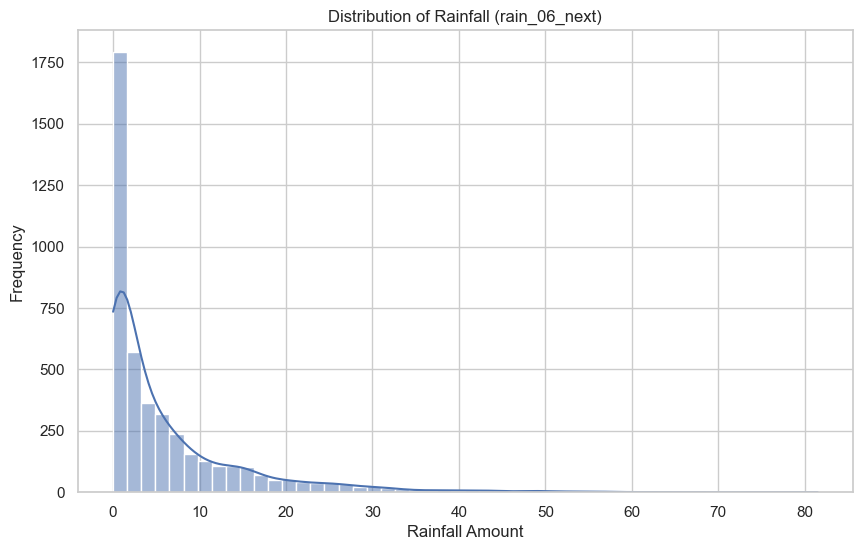

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df_daily_rain['rain_06_next'], bins=50, kde=True)
plt.title('Distribution of Rainfall (rain_06_next)')
plt.xlabel('Rainfall Amount')
plt.ylabel('Frequency')
plt.show()

2. Lineplot (yearly from 1980) - This will show the yearly average rain from 1980 onwards.

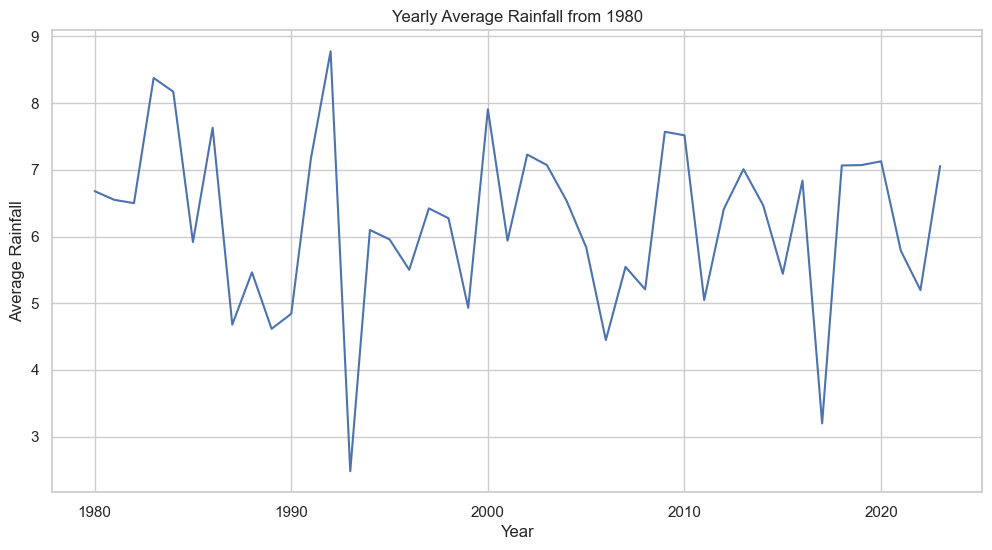

In [57]:
# Group by year to get yearly averages
yearly_avg_rain = df_daily_rain.groupby('year')['rain_06_next'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_rain[yearly_avg_rain['year'] >= 1980], x='year', y='rain_06_next')
plt.title('Yearly Average Rainfall from 1980')
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.show()

3. Lineplot (yearly last 10 years) - This will show the yearly average rain for the last 10 years.

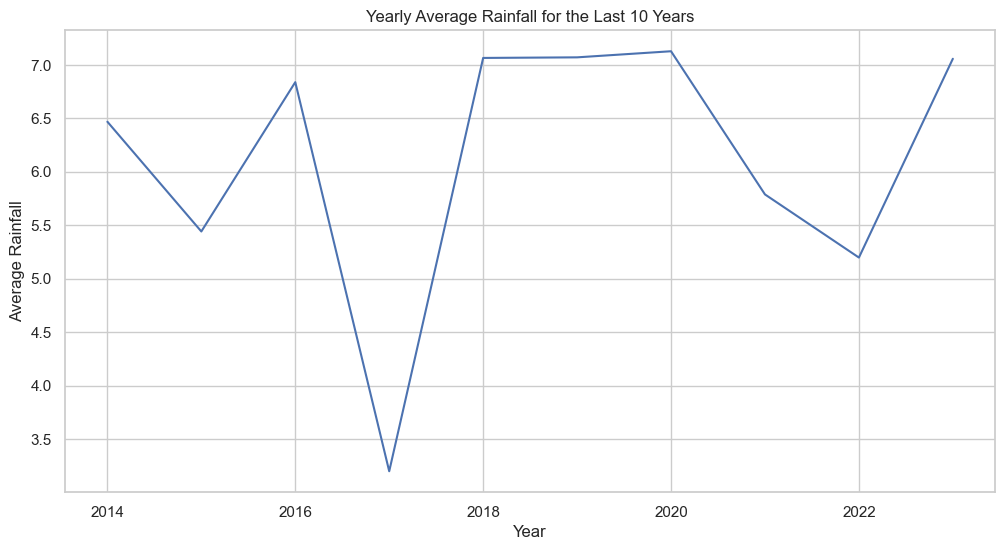

In [60]:
last_10_years = yearly_avg_rain['year'].max() - 10
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_rain[yearly_avg_rain['year'] > last_10_years], x='year', y='rain_06_next')
plt.title('Yearly Average Rainfall for the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.show()

4. Lineplot (yearly last 5 years) - This will show the yearly average rain for the last 5 years.

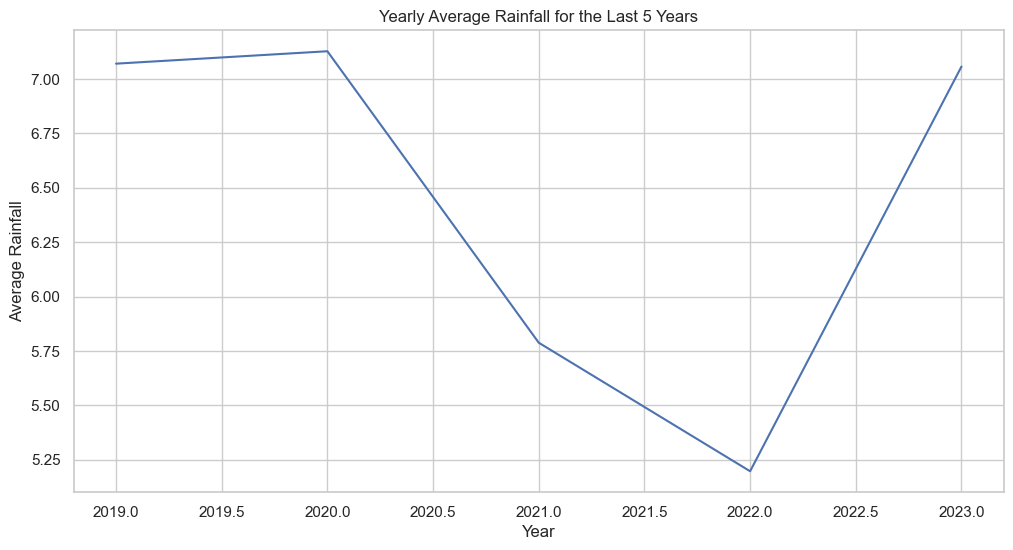

In [61]:
last_5_years = yearly_avg_rain['year'].max() - 5
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_rain[yearly_avg_rain['year'] > last_5_years], x='year', y='rain_06_next')
plt.title('Yearly Average Rainfall for the Last 5 Years')
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.show()

5. Scatter Plot with Regression Line - This will show the relationship between year and 'rain_06_next' values.

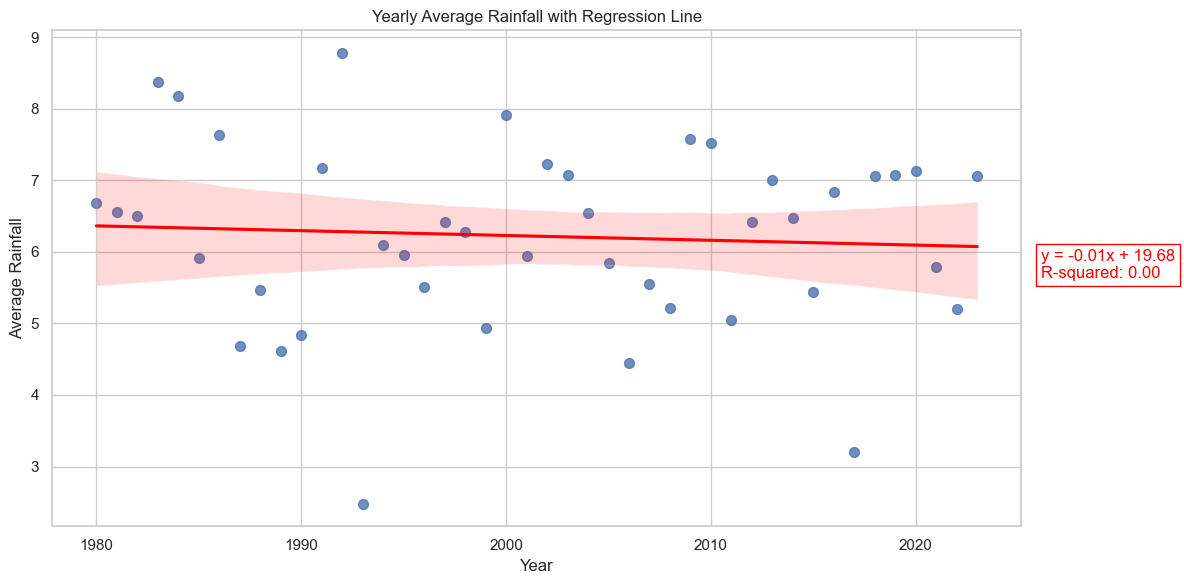

In [65]:
from scipy.stats import linregress
"""
Explanation:

By plotting the yearly averages, we reduce the number of points and make the trend clearer.
The regression equation provides a mathematical representation of the trend.
The R-squared value gives an idea of how well the regression line fits the data. A value closer to 1 indicates a better fit.
"""

# Group by year to get yearly averages
yearly_avg_rain = df_daily_rain.groupby('year')['rain_06_next'].mean().reset_index()

# Scatter plot with regression line for yearly averages
plt.figure(figsize=(12, 6))

# Use regplot for the regression line and confidence interval
sns.regplot(data=yearly_avg_rain, x='year', y='rain_06_next', scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=95)

# Get the regression line equation
slope, intercept, r_value, p_value, std_err = linregress(yearly_avg_rain['year'], yearly_avg_rain['rain_06_next'])

# Annotate outside the plot
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.2f}", 
             xy=(1.02, 0.5), xycoords='axes fraction', fontsize=12, color='red',
             bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="red"))

plt.title('Yearly Average Rainfall with Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.grid(True)
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------

## Combining the DataFrames: df_daily_rain and kineret_df

In [81]:
print(kineret_df.head())
print('-'*20)
print(df_daily_rain.head())

  Survey_Date  Kinneret_Level  cl_Level  Year
0  2022-11-27        -210.405     265.0  2022
1  2022-11-20        -210.375     265.0  2022
2  2022-11-15        -210.355     262.0  2022
3  2022-11-06        -210.285     262.0  2022
4  2022-10-30        -210.245     259.0  2022
--------------------
         stn_num Survey_Date  rain_06_next  year
1750749   320405  1992-02-01           4.0  1992
1750750   320405  1992-02-02          15.3  1992
1750751   320405  1992-02-03          15.8  1992
1750752   320405  1992-02-04          11.2  1992
1750753   320405  1992-02-05           6.7  1992


In [87]:
"""
Merge the two dataframes kineret_df and df_daily_rain based on the Survey_Date column
using an inner join, you can use the merge function 
"""
kineret_rain_df = pd.merge(kineret_df, df_daily_rain, on='Survey_Date', how='inner')
print(kineret_rain_df.head())

  Survey_Date  Kinneret_Level  cl_Level  Year  stn_num  rain_06_next  year
0  2022-10-23         -210.19     262.0  2022   320405           1.0  2022
1  2022-10-23         -210.19     262.0  2022   320448           0.8  2022
2  2022-06-12         -209.20     255.0  2022   320405           1.6  2022
3  2022-06-12         -209.20     255.0  2022   320448           0.5  2022
4  2022-03-13         -209.53     255.0  2022   320405           1.5  2022


### Data cleaning

In [88]:
# Drop the stn_num column
kineret_rain_df.drop('stn_num', axis=1, inplace=True)

# Rename the rain_06_next column to rain_in_mm
kineret_rain_df.rename(columns={'rain_06_next': 'rain_in_mm'}, inplace=True)

# Group by Survey_Date and sum the rain_in_mm values for each date
kineret_rain_df = kineret_rain_df.groupby(['Survey_Date', 'Kinneret_Level', 'cl_Level', 'Year']).agg({'rain_in_mm': 'sum'}).reset_index()

# Drop the 'Year' column
kineret_rain_df.drop('Year', axis=1, inplace=True)

print(kineret_rain_df.head())

  Survey_Date  Kinneret_Level  cl_Level  rain_in_mm
0  1980-12-14         -210.24     226.0         0.4
1  1981-01-12         -209.87     225.0         2.9
2  1981-02-24         -209.27     218.0        25.1
3  1987-01-25         -211.11     221.0         8.4
4  1987-02-08         -210.73     216.0         0.6


In [93]:
# I save this dataset for backup
kineret_rain_df.to_excel("kineret_rain_df.xlsx", sheet_name='Sheet_name_1') 

### Data exploration

In [92]:
print(kineret_rain_df.info())
print('-'*20)
print(kineret_rain_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Survey_Date     303 non-null    datetime64[ns]
 1   Kinneret_Level  303 non-null    float64       
 2   cl_Level        303 non-null    float64       
 3   rain_in_mm      303 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.6 KB
None
--------------------
                         Survey_Date  Kinneret_Level    cl_Level  rain_in_mm
count                            303      303.000000  303.000000  303.000000
mean   2004-10-10 08:38:01.188118784     -211.825380  254.366337    7.980528
min              1980-12-14 00:00:00     -214.870000  202.000000    0.000000
25%              1996-04-18 00:00:00     -213.005000  231.500000    0.100000
50%              2004-02-16 00:00:00     -211.940000  252.000000    2.400000
75%              2013-03-03 00:00:00 

### Visualizations

1. Scatter Plot with Kinneret_Level on the x-axis and rain_in_mm on the y-axis to see if there's any correlation between the two.

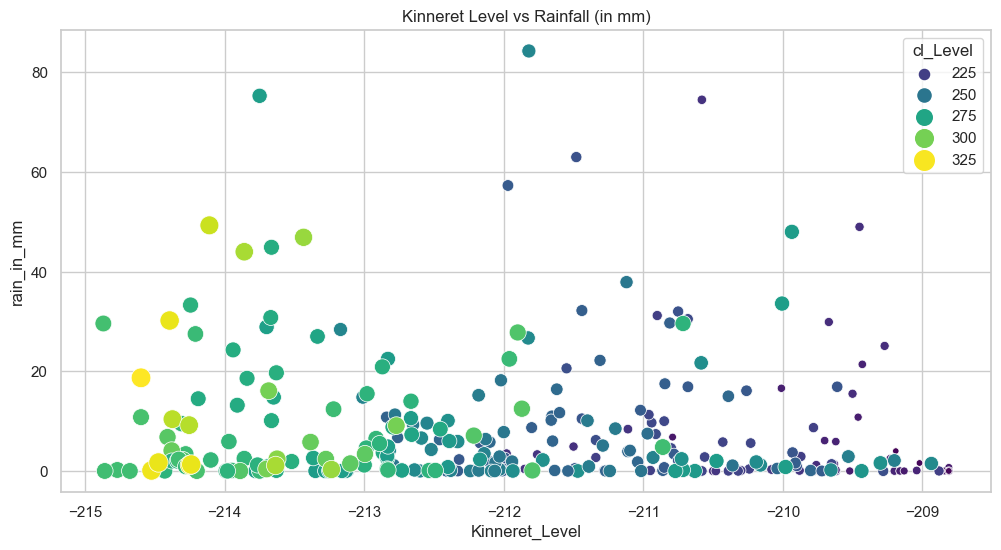

In [99]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=kineret_rain_df, x='Kinneret_Level', y='rain_in_mm', 
                hue='cl_Level', palette='viridis', size='cl_Level', sizes=(20, 200))
plt.title('Kinneret Level vs Rainfall (in mm)')
plt.show()

2. Heatmap of correlation between the numerical columns.

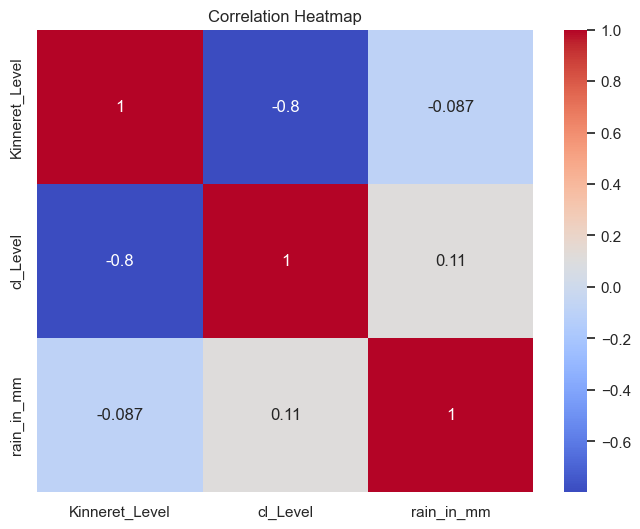

In [96]:
correlation_matrix = kineret_rain_df[['Kinneret_Level', 'cl_Level', 'rain_in_mm']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

3. Scatter Plot with Regression Line: This will help in understanding the linear relationship between Kinneret_Level and rain_in_mm.

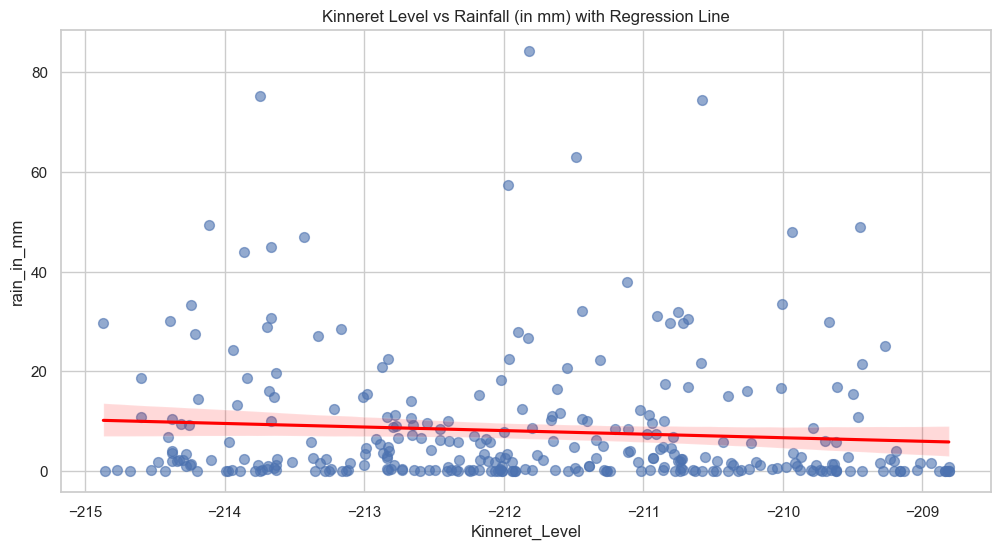

In [97]:
plt.figure(figsize=(12, 6))
sns.regplot(data=kineret_rain_df, x='Kinneret_Level', y='rain_in_mm', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Kinneret Level vs Rainfall (in mm) with Regression Line')
plt.show()

4. Yearly Averages Line Plot

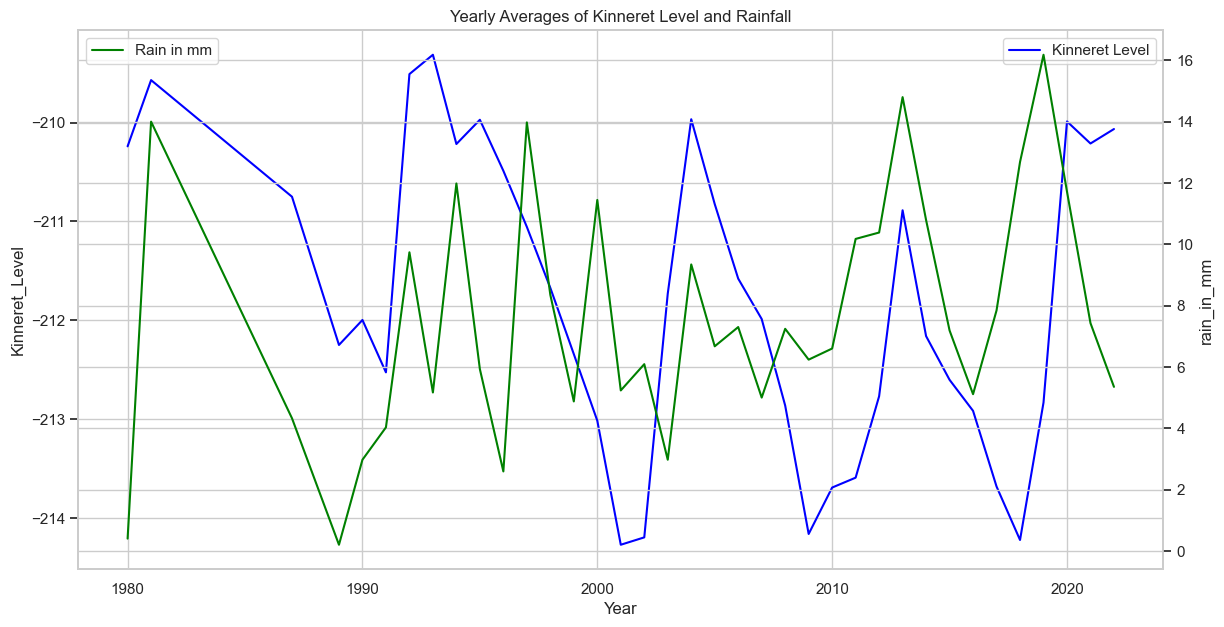

In [106]:
#kineret_rain_df['Year'] = kineret_rain_df['Survey_Date'].dt.year

yearly_averages = kineret_rain_df.groupby('Year').mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_averages, x='Year', y='Kinneret_Level', label='Kinneret Level', color='blue')
plt.twinx()
sns.lineplot(data=yearly_averages, x='Year', y='rain_in_mm', label='Rain in mm', color='green')
plt.title('Yearly Averages of Kinneret Level and Rainfall')
plt.legend(loc='upper left')
plt.show()

5. Joint Distribution Plot

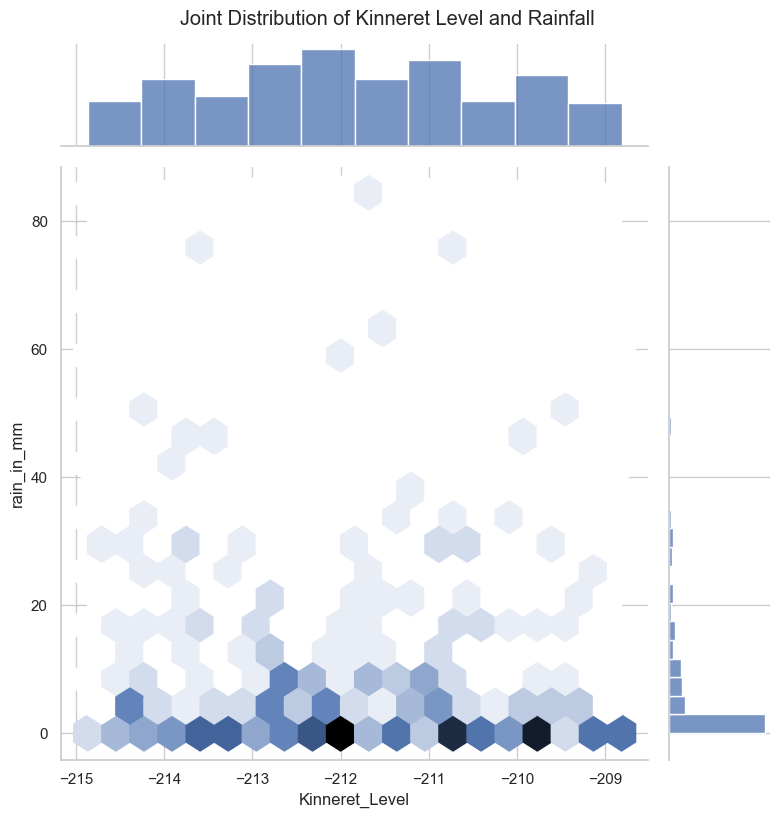

In [107]:
sns.jointplot(data=kineret_rain_df, x='Kinneret_Level', y='rain_in_mm', kind='hex', height=8)
plt.suptitle('Joint Distribution of Kinneret Level and Rainfall', y=1.02)
plt.show()

6.  Heatmap of Rain vs. Kinneret Level

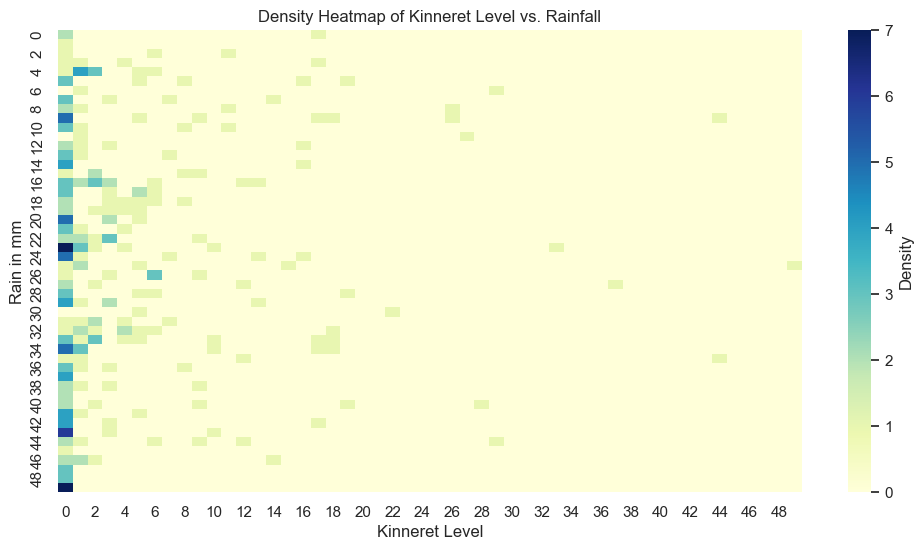

In [108]:
# Create a 2D histogram
hist_data = np.histogram2d(kineret_rain_df['Kinneret_Level'], kineret_rain_df['rain_in_mm'], bins=(50, 50))
heatmap_data = hist_data[0]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Density'})
plt.xlabel('Kinneret Level')
plt.ylabel('Rain in mm')
plt.title('Density Heatmap of Kinneret Level vs. Rainfall')
plt.show()

7. Aggregate Data by Year

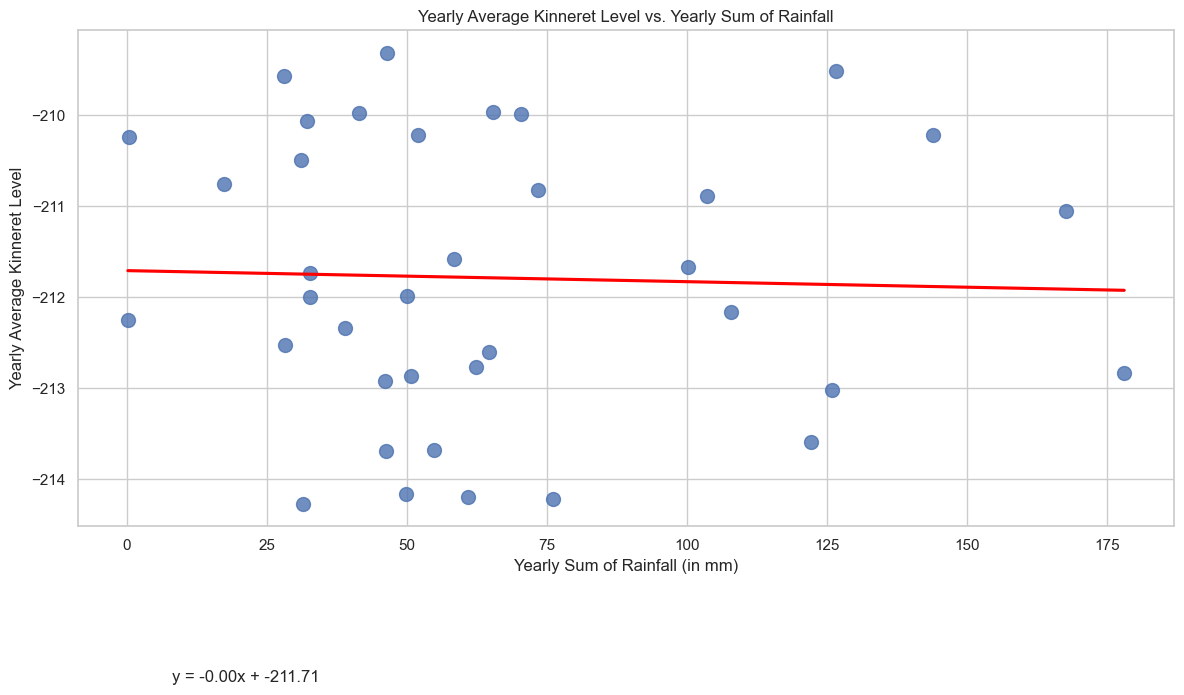

In [110]:
# Aggregate data by year
yearly_data = kineret_rain_df.groupby('Year').agg({'rain_in_mm': 'sum', 'Kinneret_Level': 'mean'}).reset_index()

# Calculate the regression line parameters: slope and intercept
slope, intercept, r_value, p_value, std_err = linregress(yearly_data['rain_in_mm'], yearly_data['Kinneret_Level'])

# Scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(data=yearly_data, x='rain_in_mm', y='Kinneret_Level', scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)
plt.title('Yearly Average Kinneret Level vs. Yearly Sum of Rainfall')
plt.xlabel('Yearly Sum of Rainfall (in mm)')
plt.ylabel('Yearly Average Kinneret Level')
plt.grid(True)

# Display the equation outside the plot
plt.gcf().text(0.15, -0.15, f"y = {slope:.2f}x + {intercept:.2f}", fontsize=12)

# Adjust layout to make space for the equation
plt.tight_layout()

plt.show()

8. 3D scatter plot

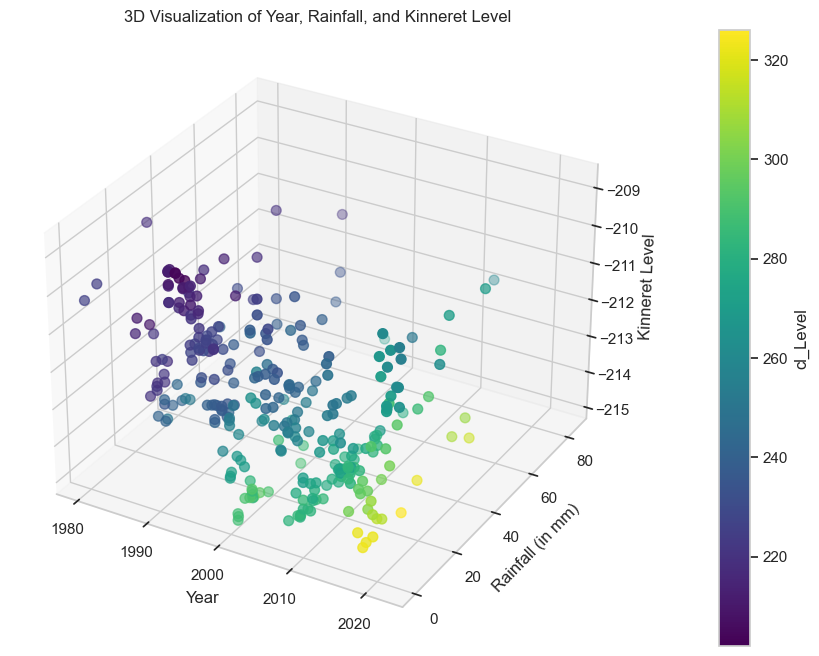

In [112]:
# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(kineret_rain_df['Year'], kineret_rain_df['rain_in_mm'], kineret_rain_df['Kinneret_Level'], c=kineret_rain_df['cl_Level'], cmap='viridis', s=50)

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall (in mm)')
ax.set_zlabel('Kinneret Level')
ax.set_title('3D Visualization of Year, Rainfall, and Kinneret Level')

# Add a colorbar
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('cl_Level')

plt.show()
